# Comparison of RIO vs. GA. vs. BOCA

## Imports

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [94]:
dir_path = "files/Full_Analysis"

# TODO: Import as CSV here
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-BOCA-DataCollection-0.csv", index_col=[0])
cacheprof_GA = pd.read_csv(f"{dir_path}/cacheprof-Genetic-DataCollection-0.csv", index_col=[0])
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-Iterative-DataCollection-0.csv", index_col=[0])

grep_BOCA = pd.read_csv(f"{dir_path}/grep-BOCA-DataCollection-0.csv", index_col=[0])
grep_GA = pd.read_csv(f"{dir_path}/grep-Genetic-DataCollection-0.csv", index_col=[0])
grep_RIO = pd.read_csv(f"{dir_path}/grep-Iterative-DataCollection-0.csv", index_col=[0])

parfib_BOCA = pd.read_csv(f"{dir_path}/parfib-BOCA-DataCollection-0.csv", index_col=[0])
parfib_GA = pd.read_csv(f"{dir_path}/parfib-Genetic-DataCollection-0.csv", index_col=[0])
parfib_RIO = pd.read_csv(f"{dir_path}/parfib-Iterative-DataCollection-0.csv", index_col=[0])

sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-DataCollection-0.csv", index_col=[0])
sorting_GA = pd.read_csv(f"{dir_path}/sorting-Genetic-DataCollection-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-Iterative-DataCollection-0.csv", index_col=[0])

program_tables = {"cacheprof": {"BOCA": cacheprof_BOCA, "GA": cacheprof_GA, "RIO": cacheprof_RIO}, "grep": {"BOCA": grep_BOCA, "GA": grep_GA, "RIO": grep_RIO}, "parfib": {"BOCA": parfib_BOCA, "GA": parfib_GA, "RIO": parfib_RIO}, "sorting": {"BOCA": sorting_BOCA, "GA": sorting_GA, "RIO": sorting_RIO}}


## Adding New Columns

### Changes to GA

In [95]:
for d_name, d in program_tables.items():
    for type, t in d.items():
        if type == "GA":
            t.rename(columns={'Fitness': 'Runtime'}, inplace=True)

### Normalization (Z-Score)

In [96]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])
        #normalized_tables[t_name] = temp_table

### Noramlization (O2)

In [97]:
for d_name, d in program_tables.items():
    for type, t in d.items():
        normalize_around = t[t["ID"] == "-O2"].iloc[0]["Runtime"]
        offset = normalize_around - t["Runtime"].mean()
        t["Norm-O2"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()

## Data Visualization

### Boxplot of Z-Score

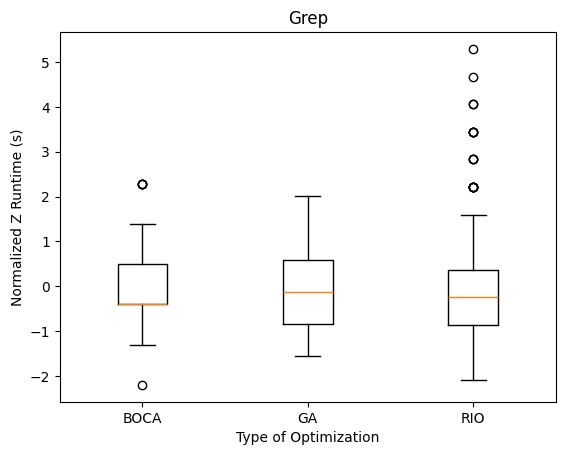

In [98]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["grep"].items():
    lst1.append(t["Norm-Z"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Grep")

plt.show()

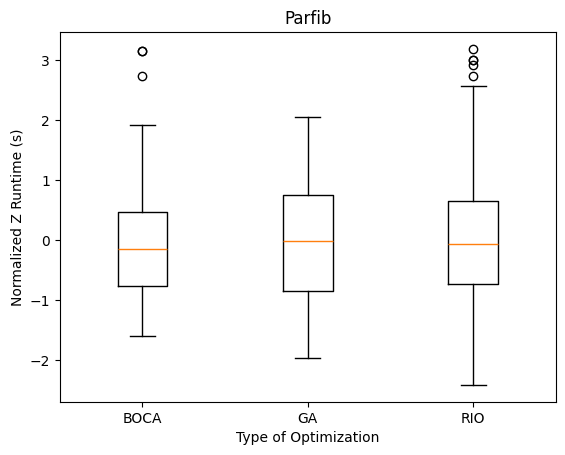

In [99]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["parfib"].items():
    lst1.append(t["Norm-Z"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Parfib")

plt.show()

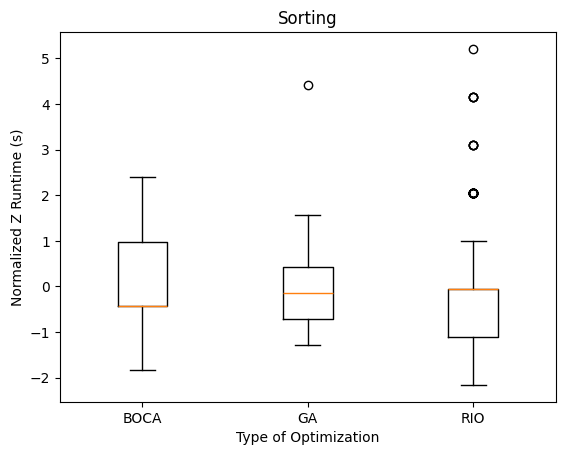

In [100]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["sorting"].items():
    lst1.append(t["Norm-Z"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Sorting")

plt.show()

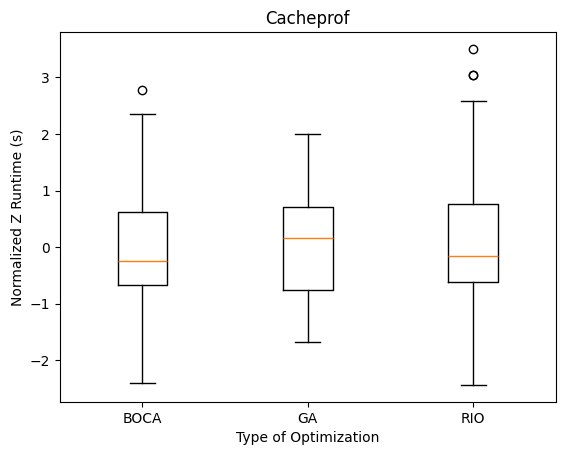

In [101]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["cacheprof"].items():
    lst1.append(t["Norm-Z"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Cacheprof")

plt.show()

### O2 Boxplot

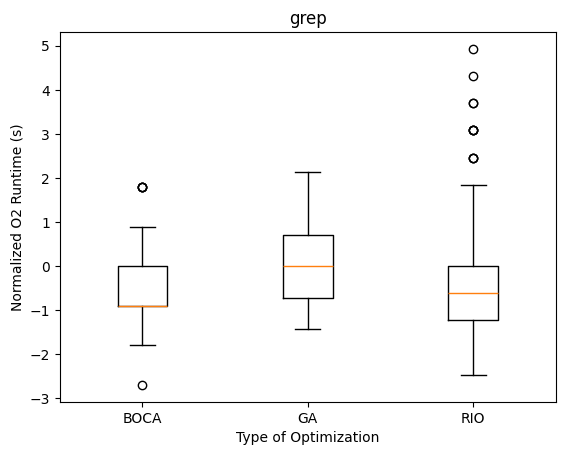

In [102]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "grep"
for type_name, t in program_tables[program_name].items():
    lst1.append(t["Norm-O2"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

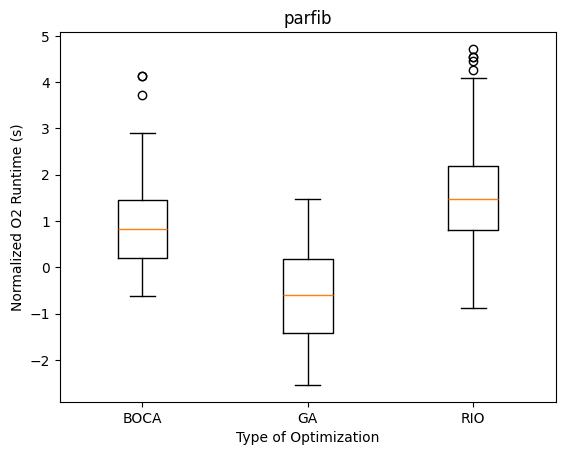

In [103]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "parfib"
for type_name, t in program_tables[program_name].items():
    lst1.append(t["Norm-O2"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

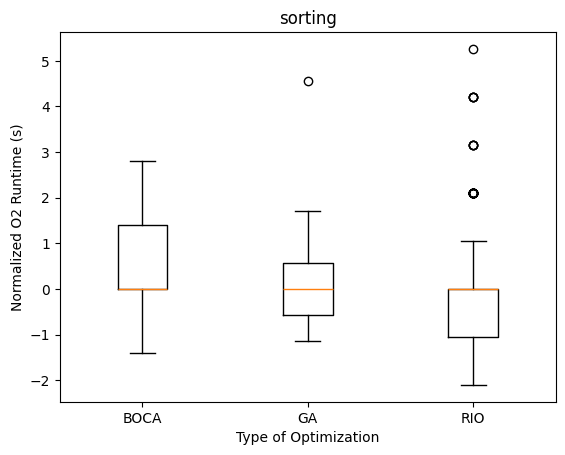

In [104]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "sorting"
for type_name, t in program_tables[program_name].items():
    lst1.append(t["Norm-O2"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

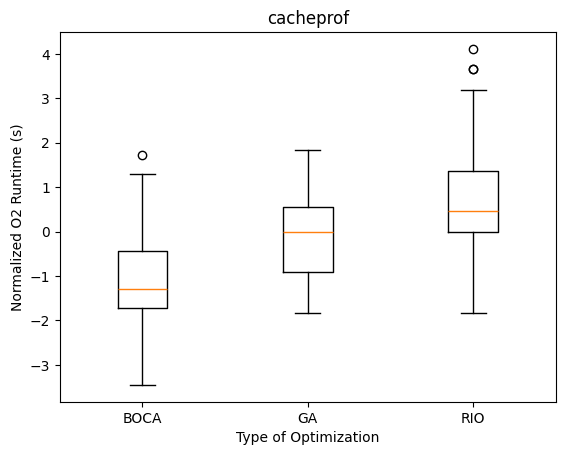

In [105]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "cacheprof"
for type_name, t in program_tables[program_name].items():
    lst1.append(t["Norm-O2"])
    labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()